In [35]:
# Import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.losses import MeanSquaredError

tf.random.set_seed(42)
np.random.seed(42)
sns.set_theme(style='darkgrid', palette='deep')


In [53]:
# Import the Dataset
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


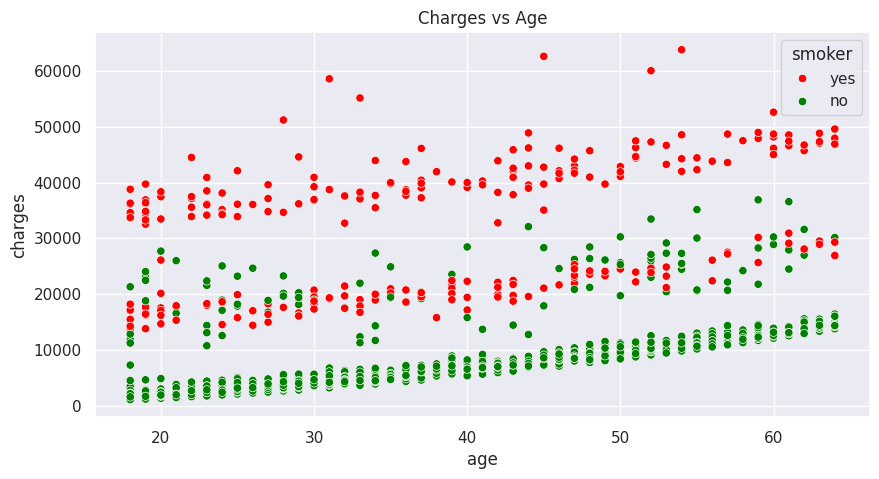

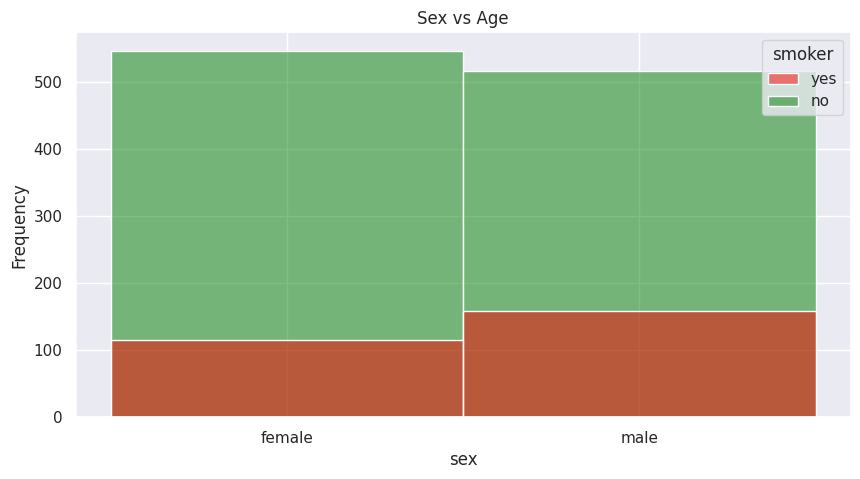

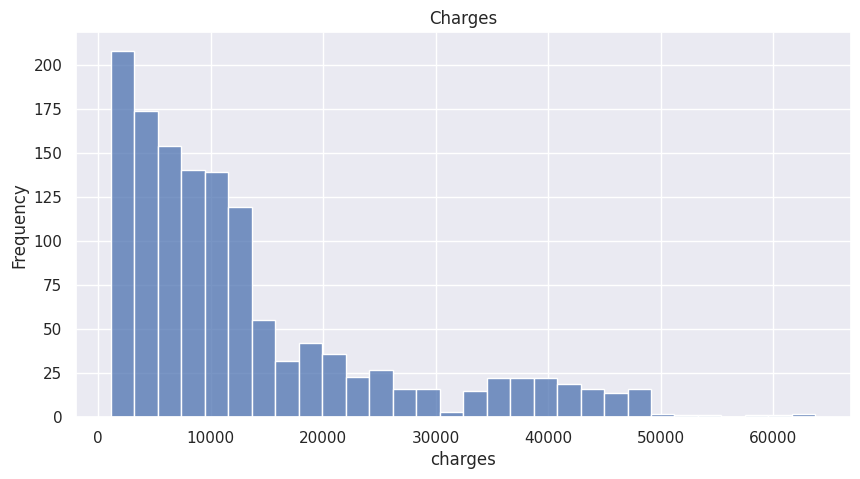

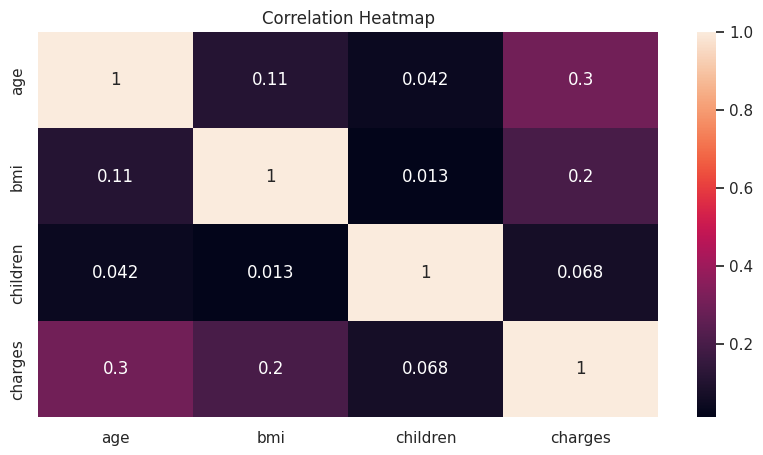

In [54]:
# Visualize the data
# Plot of Charges against Age
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='age',y='charges', hue='smoker', palette = {'yes':'red', 'no':'green'})
plt.title('Charges vs Age')
plt.show()

# Plot of Sex and Age
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='sex', hue='smoker', palette = {'yes':'red', 'no':'green'})
plt.title('Sex vs Age')
plt.ylabel('Frequency')
plt.show()

# Plot of Charges
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='charges')
plt.title('Charges')
plt.ylabel('Frequency')
plt.show()

# Plot of Correlation Heatmap of Numeric features
num_data = data.select_dtypes(include=[np.number])
#corr = num_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(num_data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [58]:
data_encoded = pd.get_dummies(data, dtype=int)
data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [59]:
# Assign the data
x = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

In [60]:
# Set seed
tf.random.set_seed(42)

# Split the data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42)

# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

In [61]:
# Fit the model
model_fit = model.fit(x_train, y_train, epochs=200, verbose=1)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12498.4033 - mae: 12498.4033
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7646.8237 - mae: 7646.8237
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7216.0742 - mae: 7216.0742
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6992.6392 - mae: 6992.6392
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6681.6670 - mae: 6681.6670
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6343.8325 - mae: 6343.8325
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6179.3921 - mae: 6179.3921
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5990.8735 - mae: 5990.8735
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5749.8965 - mae: 5749.8965
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5394.4297 - mae: 5394.4297
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4919.4600 - mae: 4919.4600
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [62]:
# Make prediction
y_pred = model.predict(x_test)
y_pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[ 9079.933 ],
       [ 5184.6035],
       [28742.371 ],
       [ 9295.205 ],
       [29334.807 ],
       [ 4594.274 ],
       [ 2054.7961],
       [14060.823 ],
       [ 3723.3071],
       [10273.687 ],
       [18153.95  ],
       [ 7220.631 ],
       [ 3885.8767],
       [47580.555 ],
       [50115.016 ],
       [44700.34  ],
       [ 9849.34  ],
       [43033.68  ],
       [ 8270.824 ],
       [22668.146 ],
       [ 5044.937 ],
       [ 7491.271 ],
       [ 1208.8503],
       [ 2788.5317],
       [11096.005 ],
       [11014.529 ],
       [12642.502 ],
       [ 5097.8486],
       [ 9692.773 ],
       [ 1090.7769],
       [ 8304.157 ],
       [11867.135 ],
       [ 2004.0917],
       [ 5681.795 ],
       [ 2851.0771],
       [ 7633.024 ],
       [ 2564.162 ],
       [ 7310.2197],
       [23909.953 ],
       [37147.082 ],
       [ 4640.482 ],
       [ 2600.5322],
       [11709.3955],
       [12152.337 ],
       [ 4879.861 ],
       [12360.42  ],
       [ 3538.203 ],
       [ 4352

In [70]:
# Model Evaluations
model.evaluate(x_test, y_test)# Using mae

# Using MSE
mse = MeanSquaredError()
mse_value = mse(y_test, y_pred)
print(f"MSE Value: {mse_value.numpy()}")

# Using RMSE
rmse = np.sqrt(mse_value.numpy())
print(f"RMSE Value: {rmse}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1457.5739 - mae: 1457.5739
MSE Value: 19641282.0
RMSE Value: 4431.8486328125


<Figure size 1000x500 with 0 Axes>

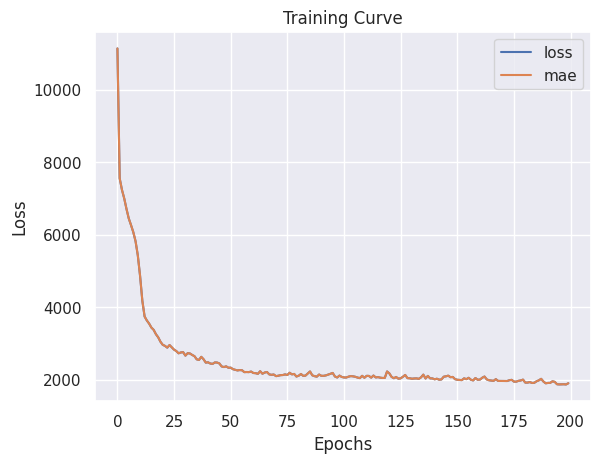

In [65]:
# Plot of the loss curve
plt.figure(figsize=(10,5))
pd.DataFrame(model_fit.history).plot()
plt.title('Training Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()